In [17]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
import numpy as np

# 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

In [18]:
import pandas as pd
import pymc as pm

# 수험생 데이터 로드
df = pd.read_csv('응답_데이터.csv', encoding='utf-8')

# 저장된 trace 불러오기
import arviz as az
trace = az.from_netcdf('irt_trace.nc')

# 수험생 수
n_examinees = len(df)

# 능력 추정치와 신뢰구간을 저장할 리스트 생성
theta_means = []
theta_lower = []
theta_upper = []

for i in range(n_examinees):
    theta_samples = trace.posterior['theta'][:, :, i].values.flatten()
    theta_mean = theta_samples.mean()
    theta_hpd = pm.stats.hdi(theta_samples, hdi_prob=0.95)
    theta_means.append(theta_mean)
    theta_lower.append(theta_hpd[0])
    theta_upper.append(theta_hpd[1])

# 결과를 데이터프레임으로 저장
examinee_parameters = df[['이름']].copy()
examinee_parameters['능력 추정치 (θ)'] = theta_means
examinee_parameters['95% 신뢰구간 하한'] = theta_lower
examinee_parameters['95% 신뢰구간 상한'] = theta_upper

# 테이블 출력
print(examinee_parameters)

           이름  능력 추정치 (θ)  95% 신뢰구간 하한  95% 신뢰구간 상한
0     Gulnara   -0.413937    -1.102973     0.234361
1     Dilnoza   -0.494929    -1.198711     0.195648
2         Ali   -1.095164    -1.856537    -0.334331
3   Narantuya    0.128300    -0.524801     0.745837
4     Preecha   -0.417927    -1.138207     0.232129
5        Jose    0.622043    -0.118629     1.216458
6    Liu Yang    2.494656     1.565900     3.574125
7         Bat    1.548197     0.815997     2.429510
8   Wang Fang   -2.216871    -3.286118    -1.104517
9        Rosa   -1.923116    -2.859719    -0.921449
10  Enkhbayar   -1.038374    -1.743405    -0.175496
11     Li Wei    0.271140    -0.343899     0.906330
12       Chai   -1.571944    -2.551551    -0.712355
13       Aziz   -1.297860    -2.069550    -0.483548
14      Hoang   -1.862389    -2.845901    -0.953706
15    Preecha   -1.620771    -2.538160    -0.725870
16       Jose   -1.622085    -2.510909    -0.745719
17  Wang Fang   -0.861865    -1.582192    -0.128330
18  Wang Fan

In [33]:
import numpy as np
import pandas as pd

# 1. 저장된 문항 매개변수 로드
item_parameters = pd.read_csv('문항_매개변수.csv', encoding='utf-8-sig')
alpha_est = item_parameters['변별도 (alpha)'].values
beta_est = item_parameters['난이도 (beta)'].values

# 2. 저장된 수험생 능력 추정치 로드
examinee_parameters = pd.read_csv('수험생_능력_추정치.csv', encoding='utf-8-sig')
theta_est = examinee_parameters['능력 추정치 (theta)'].values

df = pd.read_csv('응답_데이터.csv', encoding='utf-8')

# 그룹 정보 추출 (예: 성별)
group_labels = df['성별'].values
group_names = np.unique(group_labels)

# 'OX리스트' 열을 2차원 배열로 변환하는 함수 정의
def ox_to_binary(ox_string):
    return [1 if char == 'O' else 0 for char in ox_string]

# 응답 데이터를 처리하여 NumPy 배열로 변환
df['responses'] = df['OX리스트'].apply(ox_to_binary)
response_data = pd.DataFrame(df['responses'].tolist())
data = response_data.values

# 문항 수 정의
n_items = data.shape[1]

# 분석할 수험생의 인덱스 설정 (예: 첫 번째 수험생)
examinee_index = 1

# 수험생의 실제 응답
actual_responses = data[examinee_index]

# 수험생의 능력 추정치
theta_i = theta_est[examinee_index]

# 각 문항에 대한 예상 정답 확률 계산
p_i = 1 / (1 + np.exp(-alpha_est * (theta_i - beta_est)))

# 결과를 데이터프레임으로 정리
individual_analysis = pd.DataFrame({
    '문항 번호': np.arange(1, n_items+1),
    '실제 응답': actual_responses,
    '예상 정답 확률': p_i,
    '예상 응답': (p_i >= 0.5).astype(int)
})

# 테이블 출력
print(individual_analysis)

    문항 번호  실제 응답  예상 정답 확률  예상 응답
0       1      0  0.232489      0
1       2      1  0.441446      0
2       3      0  0.282995      0
3       4      0  0.227358      0
4       5      1  0.375263      0
5       6      1  0.322259      0
6       7      0  0.232038      0
7       8      0  0.242383      0
8       9      0  0.317867      0
9      10      0  0.270766      0
10     11      1  0.418989      0
11     12      0  0.262237      0
12     13      0  0.348600      0
13     14      0  0.260212      0
14     15      1  0.282440      0
15     16      0  0.301404      0
16     17      0  0.447568      0
17     18      1  0.382102      0
18     19      0  0.310275      0
19     20      0  0.447447      0
20     21      0  0.355571      0
21     22      1  0.429142      0
22     23      0  0.260134      0
23     24      1  0.318066      0
24     25      1  0.291738      0
25     26      0  0.391884      0
26     27      0  0.284829      0
27     28      0  0.300590      0
28     29     

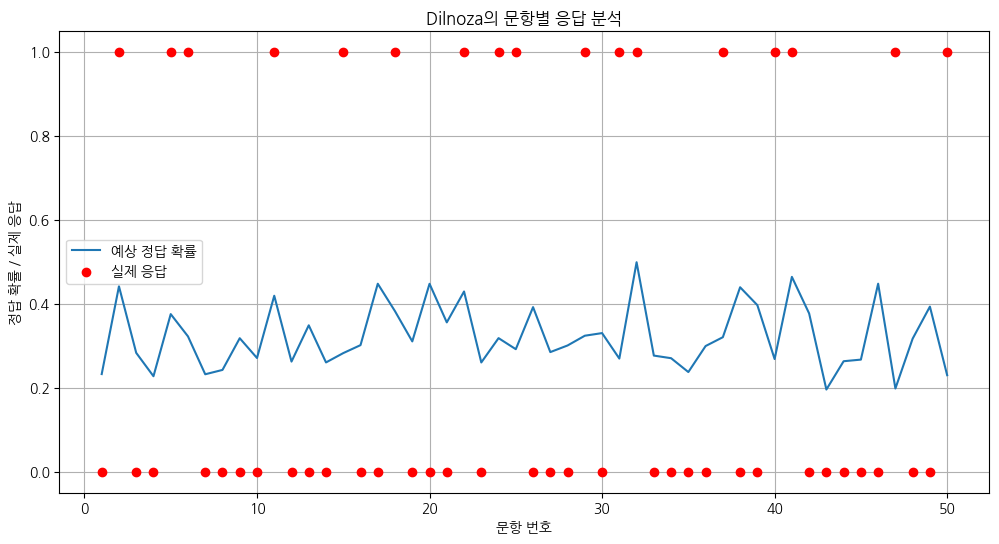

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(individual_analysis['문항 번호'], individual_analysis['예상 정답 확률'], label='예상 정답 확률')
plt.scatter(individual_analysis['문항 번호'], individual_analysis['실제 응답'], color='red', label='실제 응답', zorder=5)
plt.xlabel('문항 번호')
plt.ylabel('정답 확률 / 실제 응답')
plt.title(f"{df.iloc[examinee_index]['이름']}의 문항별 응답 분석")
plt.legend()
plt.grid(True)
plt.show()

    문항 번호        잔차
0       1 -0.232489
1       2  0.558554
2       3 -0.282995
3       4 -0.227358
4       5  0.624737
5       6  0.677741
6       7 -0.232038
7       8 -0.242383
8       9 -0.317867
9      10 -0.270766
10     11  0.581011
11     12 -0.262237
12     13 -0.348600
13     14 -0.260212
14     15  0.717560
15     16 -0.301404
16     17 -0.447568
17     18  0.617898
18     19 -0.310275
19     20 -0.447447
20     21 -0.355571
21     22  0.570858
22     23 -0.260134
23     24  0.681934
24     25  0.708262
25     26 -0.391884
26     27 -0.284829
27     28 -0.300590
28     29  0.676180
29     30 -0.330048
30     31  0.730599
31     32  0.501134
32     33 -0.276508
33     34 -0.270297
34     35 -0.237339
35     36 -0.299249
36     37  0.679715
37     38 -0.439198
38     39 -0.396573
39     40  0.731733
40     41  0.536059
41     42 -0.376878
42     43 -0.195683
43     44 -0.263100
44     45 -0.266928
45     46 -0.447698
46     47  0.801827
47     48 -0.316838
48     49 -0.393121


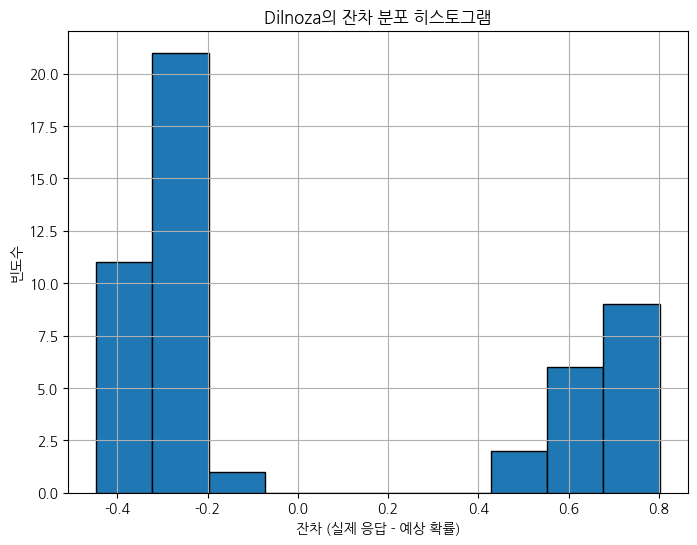

In [35]:
# 잔차 계산
residuals = actual_responses - p_i

# 잔차 테이블 생성
residuals_df = pd.DataFrame({
    '문항 번호': np.arange(1, n_items+1),
    '잔차': residuals
})

# 테이블 출력
print(residuals_df)

# 잔차 히스토그램 그리기
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=10, edgecolor='black')
plt.xlabel('잔차 (실제 응답 - 예상 확률)')
plt.ylabel('빈도수')
plt.title(f"{df.iloc[examinee_index]['이름']}의 잔차 분포 히스토그램")
plt.grid(True)
plt.show()

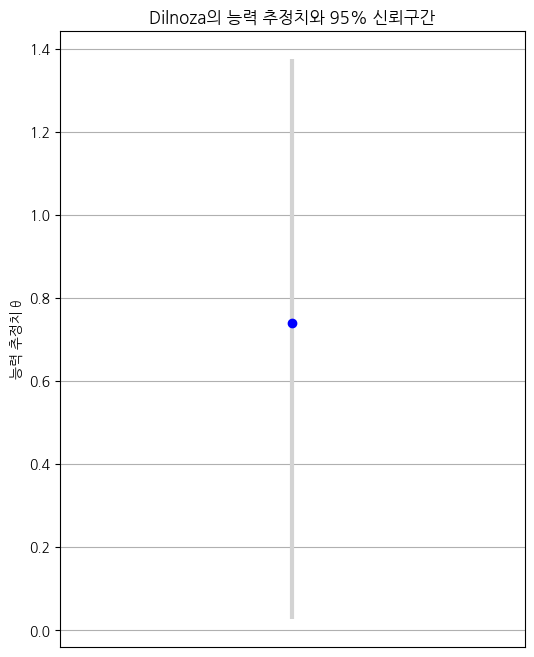

In [36]:
plt.figure(figsize=(6, 8))
plt.errorbar(x=0, y=theta_mean, yerr=[[theta_mean - theta_hpd[0]], [theta_hpd[1] - theta_mean]],
             fmt='o', color='blue', ecolor='lightgray', elinewidth=3, capsize=0)
plt.xticks([])
plt.ylabel('능력 추정치 θ')
plt.title(f"{df.iloc[examinee_index]['이름']}의 능력 추정치와 95% 신뢰구간")
plt.grid(True)
plt.show()

/tmp/ipykernel_3131899/1268738240.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(theta_est, shade=True, label='전체 능력 분포')


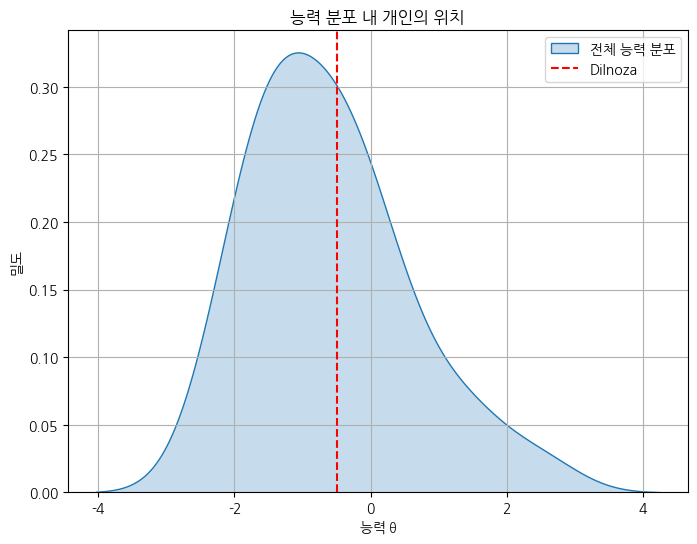

In [37]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.kdeplot(theta_est, shade=True, label='전체 능력 분포')
plt.axvline(theta_est[examinee_index], color='red', linestyle='--', label=f"{df.iloc[examinee_index]['이름']}")
plt.xlabel('능력 θ')
plt.ylabel('밀도')
plt.title('능력 분포 내 개인의 위치')
plt.legend()
plt.grid(True)
plt.show()

    문항 번호       정보량
0       1  0.254534
1       2  0.028848
2       3  0.210851
3       4  0.273164
4       5  0.041632
5       6  0.098323
6       7  0.147066
7       8  0.201579
8       9  0.235191
9      10  0.275062
10     11  0.064718
11     12  0.095927
12     13  0.065525
13     14  0.329852
14     15  0.231859
15     16  0.095783
16     17  0.020180
17     18  0.092166
18     19  0.132379
19     20  0.042291
20     21  0.097096
21     22  0.310717
22     23  0.318574
23     24  0.226138
24     25  0.179814
25     26  0.247866
26     27  0.199133
27     28  0.402381
28     29  0.188907
29     30  0.174405
30     31  0.275186
31     32  0.199012
32     33  0.250619
33     34  0.302161
34     35  0.229295
35     36  0.354853
36     37  0.183552
37     38  0.520986
38     39  0.065480
39     40  0.286305
40     41  0.016919
41     42  0.066965
42     43  0.237605
43     44  0.152715
44     45  0.316178
45     46  0.037128
46     47  0.138425
47     48  0.110715
48     49  0.074943


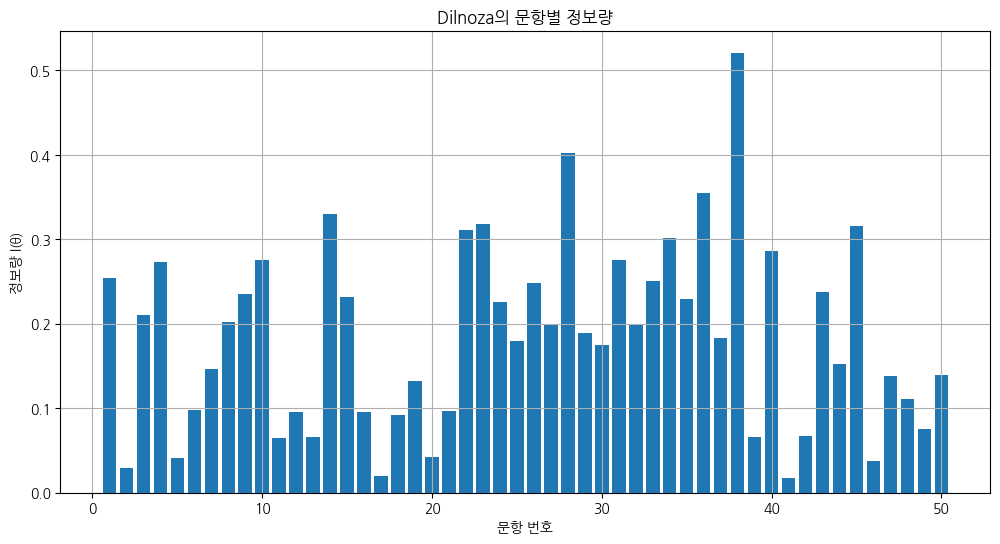

In [38]:
# 문항 정보량 계산
info_i = (alpha_est ** 2) * p_i * (1 - p_i)

# 정보량 테이블 생성
info_df = pd.DataFrame({
    '문항 번호': np.arange(1, n_items+1),
    '정보량': info_i
})

# 테이블 출력
print(info_df)

# 정보량 막대그래프 그리기
plt.figure(figsize=(12, 6))
plt.bar(info_df['문항 번호'], info_df['정보량'])
plt.xlabel('문항 번호')
plt.ylabel('정보량 I(θ)')
plt.title(f"{df.iloc[examinee_index]['이름']}의 문항별 정보량")
plt.grid(True)
plt.show()

In [25]:
# 실제 총점 계산
actual_score = actual_responses.sum()

# 예상 총점 계산
expected_score = p_i.sum()

# 결과 출력
print(f"{df.iloc[examinee_index]['이름']}의 실제 총점: {actual_score}")
print(f"{df.iloc[examinee_index]['이름']}의 예상 총점: {expected_score:.2f}")

Gulnara의 실제 총점: 17
Gulnara의 예상 총점: 16.89


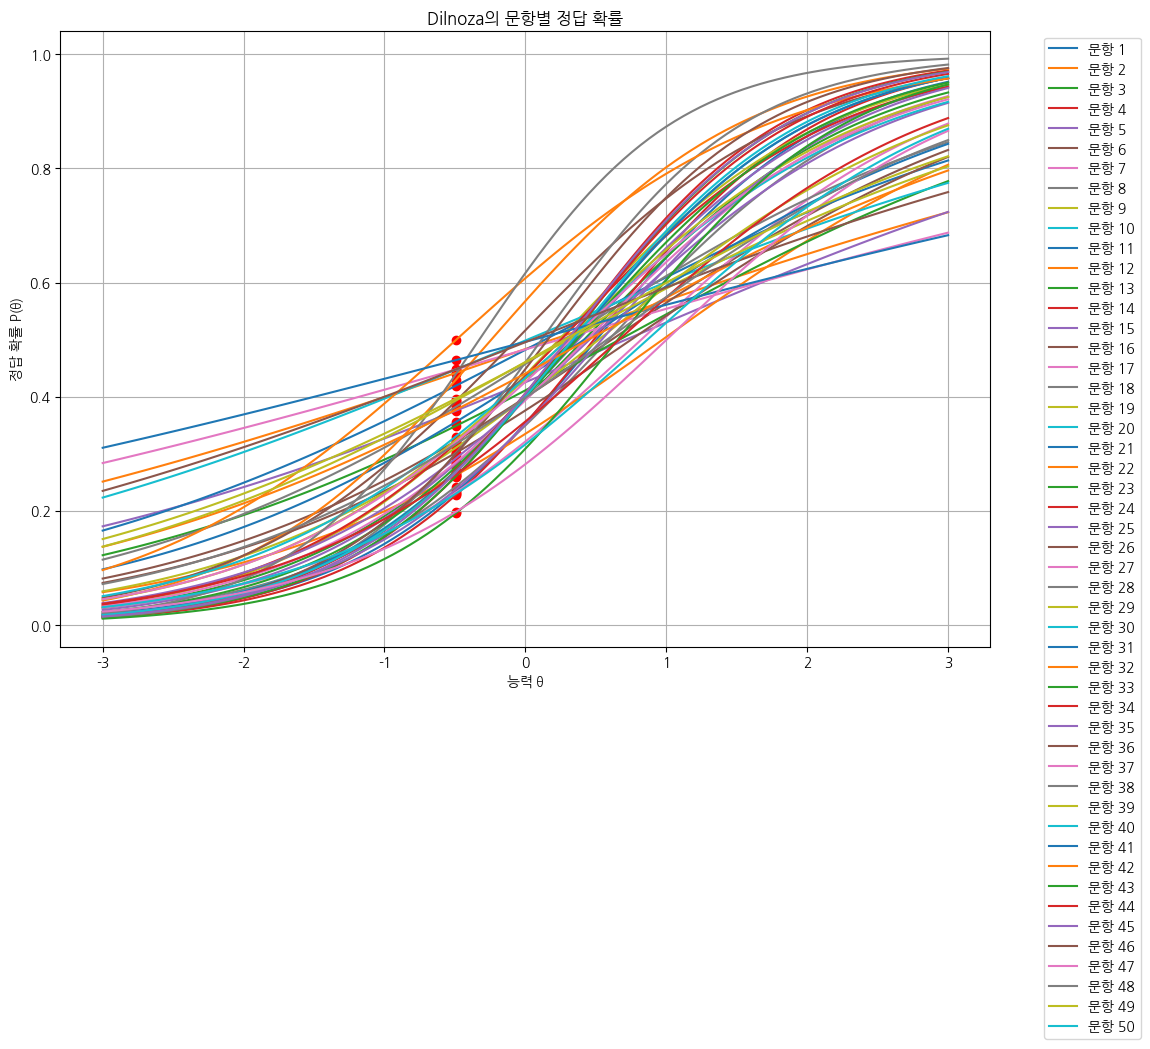

In [39]:
plt.figure(figsize=(12, 8))
for i in range(n_items):
    alpha_i = alpha_est[i]
    beta_i = beta_est[i]
    theta_range = np.linspace(-3, 3, 100)
    p_theta = 1 / (1 + np.exp(-alpha_i * (theta_range - beta_i)))
    plt.plot(theta_range, p_theta, label=f'문항 {i+1}')
    # 수험생의 능력 수준에서의 정답 확률
    p_individual = 1 / (1 + np.exp(-alpha_i * (theta_est[examinee_index] - beta_i)))
    plt.scatter(theta_est[examinee_index], p_individual, color='red')

plt.xlabel('능력 θ')
plt.ylabel('정답 확률 P(θ)')
plt.title(f"{df.iloc[examinee_index]['이름']}의 문항별 정답 확률")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

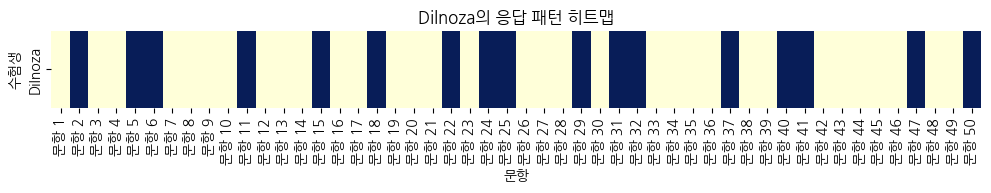

In [40]:
import seaborn as sns

# 수험생의 응답 데이터 생성
individual_data = data[examinee_index].reshape(1, -1)

plt.figure(figsize=(12, 1))
sns.heatmap(individual_data, cmap='YlGnBu', cbar=False, xticklabels=[f'문항 {i+1}' for i in range(n_items)],
            yticklabels=[df.iloc[examinee_index]['이름']])
plt.xlabel('문항')
plt.ylabel('수험생')
plt.title(f"{df.iloc[examinee_index]['이름']}의 응답 패턴 히트맵")
plt.show()

In [41]:
from scipy.stats import zscore

# 잔차의 표준화
standardized_residuals = zscore(residuals)

# 표준화된 잔차 테이블 생성
std_residuals_df = pd.DataFrame({
    '문항 번호': np.arange(1, n_items+1),
    '표준화된 잔차': standardized_residuals
})

# 테이블 출력
print(std_residuals_df)

# 이상치 탐지 (절대값이 2를 넘는 경우)
outliers = std_residuals_df[np.abs(std_residuals_df['표준화된 잔차']) > 2]
print("이상 응답 문항:")
print(outliers)

    문항 번호   표준화된 잔차
0       1 -0.537996
1       2  1.163726
2       3 -0.646645
3       4 -0.526958
4       5  1.306102
5       6  1.420125
6       7 -0.537025
7       8 -0.559279
8       9 -0.721665
9      10 -0.620338
10     11  1.212038
11     12 -0.601991
12     13 -0.787778
13     14 -0.597635
14     15  1.505786
15     16 -0.686249
16     17 -1.000683
17     18  1.291389
18     19 -0.705332
19     20 -1.000422
20     21 -0.802775
21     22  1.190195
22     23 -0.597467
23     24  1.429146
24     25  1.485783
25     26 -0.880891
26     27 -0.650591
27     28 -0.684498
28     29  1.416767
29     30 -0.747868
30     31  1.533836
31     32  1.040203
32     33 -0.632691
33     34 -0.619329
34     35 -0.548429
35     36 -0.681612
36     37  1.424372
37     38 -0.982676
38     39 -0.890979
39     40  1.536275
40     41  1.115333
41     42 -0.848611
42     43 -0.458818
43     44 -0.603847
44     45 -0.612083
45     46 -1.000962
46     47  1.687065
47     48 -0.719452
48     49 -0.883554


In [29]:
# 여러 시점의 능력 추정치 (예시로 두 시점 사용)
theta_est_time1 = ...  # 첫 번째 시점의 능력 추정치 배열
theta_est_time2 = ...  # 두 번째 시점의 능력 추정치 배열

# 수험생의 인덱스
examinee_index = 0

# 수험생의 능력 추정치 변화
theta_time1 = theta_est_time1[examinee_index]
theta_time2 = theta_est_time2[examinee_index]

# 변화 시각화
plt.figure(figsize=(8, 6))
plt.plot(['시점 1', '시점 2'], [theta_time1, theta_time2], marker='o')
plt.xlabel('평가 시점')
plt.ylabel('능력 추정치 θ')
plt.title(f"{df.iloc[examinee_index]['이름']}의 능력 추정치 변화 추적")
plt.grid(True)
plt.show()

TypeError: 'ellipsis' object is not subscriptable

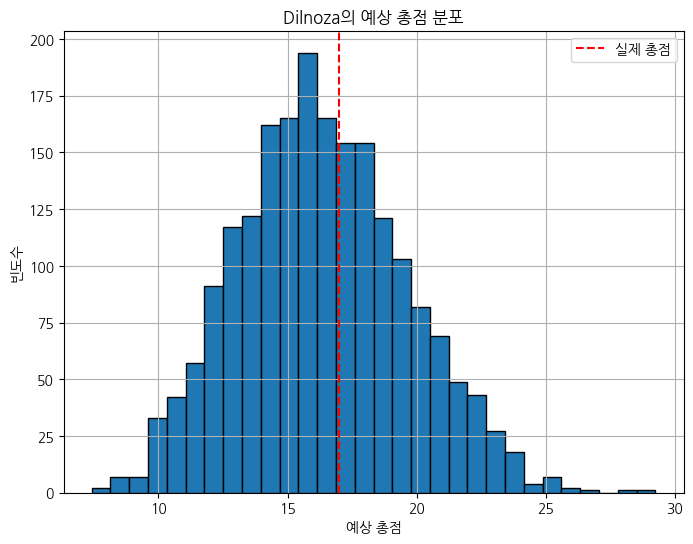

In [42]:
# 해당 수험생의 능력 추정치 샘플 추출
theta_samples = trace.posterior['theta'][:, :, examinee_index].values.flatten()

# 예상 총점 샘플 생성
expected_scores = []
for theta_sample in theta_samples:
    p_sample = 1 / (1 + np.exp(-alpha_est * (theta_sample - beta_est)))
    expected_score = p_sample.sum()
    expected_scores.append(expected_score)

# 예상 총점 분포 시각화
plt.figure(figsize=(8, 6))
plt.hist(expected_scores, bins=30, edgecolor='black')
plt.axvline(actual_score, color='red', linestyle='--', label='실제 총점')
plt.xlabel('예상 총점')
plt.ylabel('빈도수')
plt.title(f"{df.iloc[examinee_index]['이름']}의 예상 총점 분포")
plt.legend()
plt.grid(True)
plt.show()

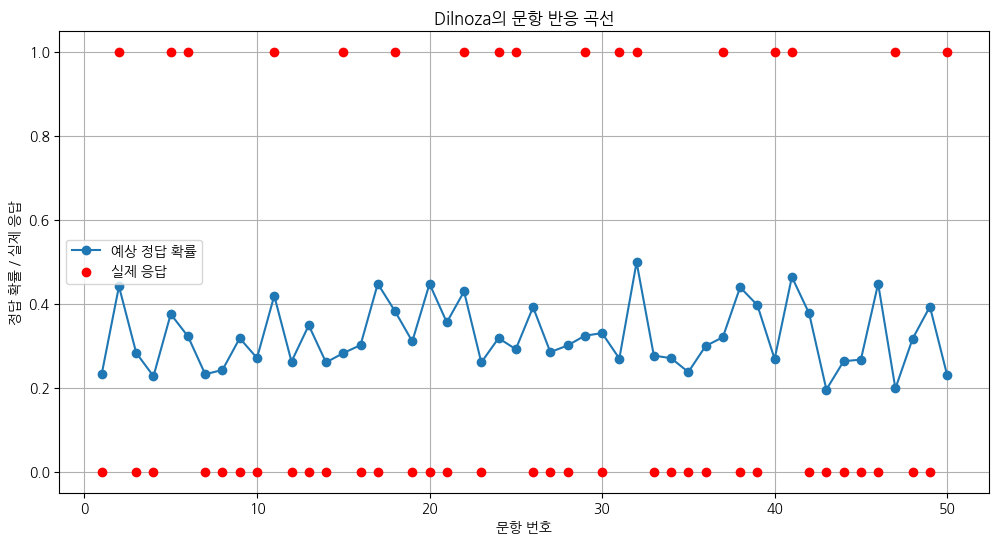

In [43]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, n_items+1), p_i, marker='o', label='예상 정답 확률')
plt.scatter(np.arange(1, n_items+1), actual_responses, color='red', label='실제 응답', zorder=5)
plt.xlabel('문항 번호')
plt.ylabel('정답 확률 / 실제 응답')
plt.title(f"{df.iloc[examinee_index]['이름']}의 문항 반응 곡선")
plt.legend()
plt.grid(True)
plt.show()

  능력/기술  숙달도
0   기술3  1.0
1   기술2  0.0
2   기술1  0.0


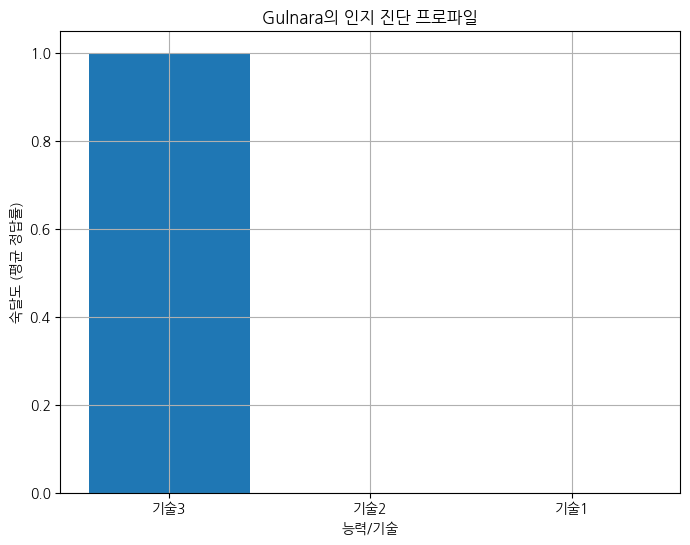

In [32]:
# 문항별로 측정하는 능력을 정의 (예시)
skills = ['기술1', '기술2', '기술1', '기술3', '기술2']  # 문항 수에 맞게 수정

# 수험생의 응답 가져오기
individual_responses = data[examinee_index]

# 능력별로 정답률 계산
skill_mastery = {}
for skill in set(skills):
    indices = [i for i, s in enumerate(skills) if s == skill]
    responses = individual_responses[indices]
    skill_mastery[skill] = responses.mean()

# 결과를 데이터프레임으로 정리
skill_mastery_df = pd.DataFrame(list(skill_mastery.items()), columns=['능력/기술', '숙달도'])

# 테이블 출력
print(skill_mastery_df)

# 막대그래프로 시각화
plt.figure(figsize=(8, 6))
plt.bar(skill_mastery_df['능력/기술'], skill_mastery_df['숙달도'])
plt.xlabel('능력/기술')
plt.ylabel('숙달도 (평균 정답률)')
plt.title(f"{df.iloc[examinee_index]['이름']}의 인지 진단 프로파일")
plt.grid(True)
plt.show()